# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df = pd.read_csv("data/colors.csv")

In [3]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [22]:
# print the list of unique values in a column
colors_df.name.nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [23]:
# total transparent colors
colors_df[colors_df["is_trans"] == "t"].count()

# value_counts() method is a very quick way of finding the number of members of each category. 
colors_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [24]:
# total opaque colors
colors_df[colors_df["is_trans"] == "f"].count()

colors_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [27]:
sets_df = pd.read_csv("data/sets.csv")
print(sets_df.head())
print(sets_df.tail())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


In [30]:
sets_df.count()

set_num      15710
name         15710
year         15710
theme_id     15710
num_parts    15710
dtype: int64

In [31]:
sets_df.shape

(15710, 5)

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [41]:
# year in which the first lego is released
print(sets_df.year.min())

# name of the first lego set
print(sets_df.name[sets_df.year.idxmin()])

1949
Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [42]:
sets_df[sets_df["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [38]:
# printing the top 5 LEGO sets with the most number of parts
# sets_df.sort_values(by="num_parts", ascending=False).head()

sets_df.sort_values(by="num_parts", ascending=False)[:5]

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [43]:
# number of LEGO sets released year on year
sets_df.groupby(by="year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [51]:
# number of sets released in 1955 and 2019
print("1955")
print(sets_df[sets_df.year == 1955].count())
print()
print("2019")
print(sets_df[sets_df.year == 2019].count())

1955
set_num      28
name         28
year         28
theme_id     28
num_parts    28
dtype: int64

2019
set_num      840
name         840
year         840
theme_id     840
num_parts    840
dtype: int64


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [71]:
# creating a datafram with year and number of sets released
sets_by_year_df = sets_df[["year", "set_num"]].groupby(by="year").count()
sets_by_year_df.head()
sets_by_year_df.tail()
# print(sets_by_year_df.set_num.max())

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


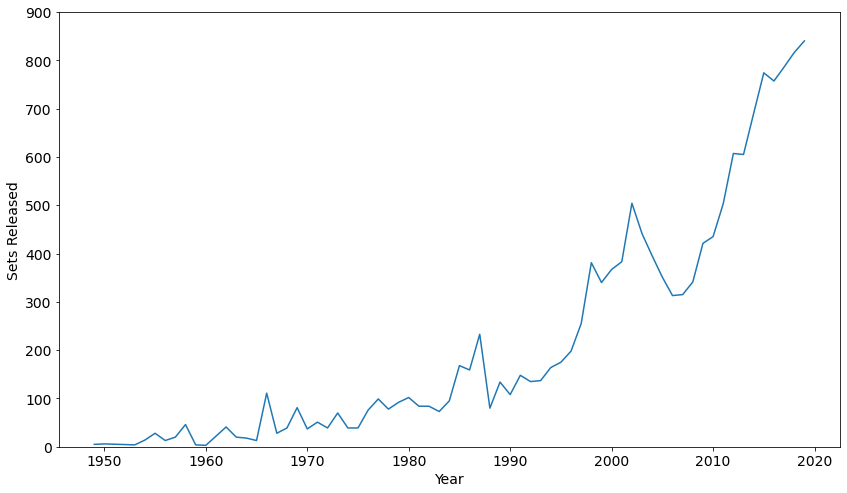

In [72]:
# Plotting the line graph
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Year", fontsize=14)
plt.ylabel(ylabel="Sets Released", fontsize=14)
plt.ylim(0, 900)
# slicing to avoid the last two rows
plt.plot(sets_by_year_df.index[:-2], sets_by_year_df.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [75]:
# we want to calculate the number of different themes by calendar year. 
# This means we have to group the data by year and then count the number of unique theme_ids for that year. 

# the .agg() method takes a dictionary as an argument. 
# In this dictionary, we specify which operation we'd like to apply to each column. 
# In our case, we just want to calculate the number of unique entries in the theme_id column by using the .nunique() method.

themes_by_year_df = sets_df.groupby(by="year").agg({"theme_id": pd.Series.nunique})
themes_by_year_df.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [86]:
# rename the column name
themes_by_year_df.rename(columns={"theme_id": "nr_themes"}, inplace=True)
print(themes_by_year_df.head())
print(themes_by_year_df.tail())
# themes_by_year_df.nr_themes.max()

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
      nr_themes
year           
2017         89
2018         93
2019         78
2020         82
2021          1


98

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

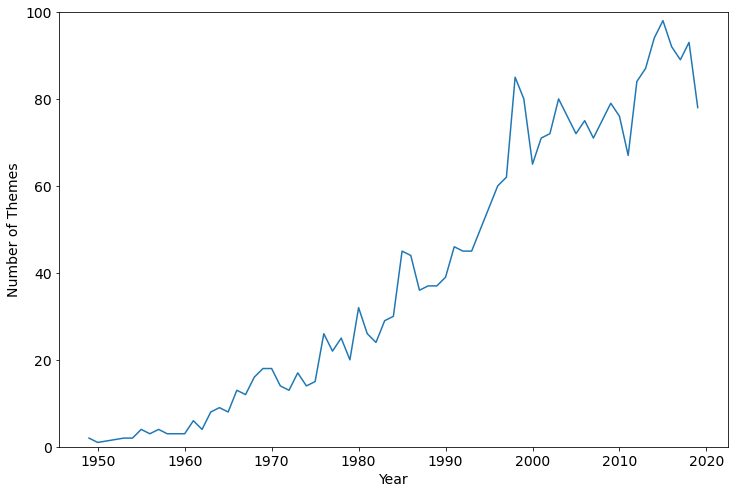

In [108]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Year", fontsize=14)
plt.ylabel(ylabel="Number of Themes", fontsize=14)
plt.ylim(0, 100 )
plt.plot(themes_by_year_df.index[:-2], themes_by_year_df.nr_themes[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

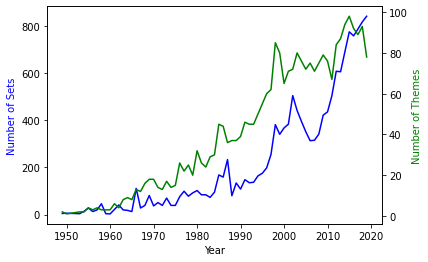

In [107]:
axis_1 = plt.gca()  # get current axes
axis_2 = plt.twinx()  # create another axis that shares the same x axis

# plot the two graphs
axis_1.plot(themes_by_year_df.index[:-2], sets_by_year_df.set_num[:-2], color="b") # year vs number of sets
axis_2.plot(themes_by_year_df.index[:-2], themes_by_year_df.nr_themes[:-2], color="g") # year vs number of themes

axis_1.set_xlabel(xlabel="Year")
axis_2.set_xlabel(xlabel="Year")
axis_1.set_ylabel(ylabel="Number of Sets", color="blue")
axis_2.set_ylabel(ylabel="Number of Themes", color="green")



**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [99]:
parts_per_set_df = sets_df.groupby(by="year").agg({"num_parts": pd.Series.mean})

In [103]:
print(f"Head:\n {parts_per_set_df.head()}")
print()
print(f"Tail:\n {parts_per_set_df.tail()}")

Head:
       num_parts
year           
1949  99.600000
1950   1.000000
1953  13.500000
1954  12.357143
1955  36.607143

Tail:
        num_parts
year            
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

Text(0.5, 0, 'Year')

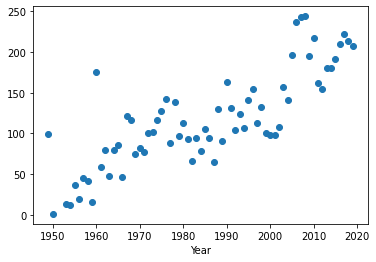

In [105]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Year", fontsize=14)
plt.ylabel(ylabel="Average Number of Parts", fontsize=14)
plt.ylim(0, 100 )
plt.scatter(parts_per_set_df.index[:-2], parts_per_set_df.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [141]:
# To count the number of sets per Theme we can use the .value_counts() method on our theme_id column
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

### Database Schema
<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [146]:
# The sets .csv has theme_ids which match the id column in the themes.csv
# This means that the theme_id is the foreign key inside the sets.csv
# Many different sets can be part of the same theme.
# But inside the themes.csv, each theme_id, which isjust called id is unique.
# This uniqueness makes the id column the primary key inside the themes.csv.
themes_df = pd.read_csv("data/themes.csv")
print("Tail\n", themes_df.head())
print("\n")
print("Head\n", themes_df.tail())

Tail
    id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


Head
       id                   name  parent_id
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN


In [127]:
# Number of ids corresponding to Star Wars
themes_df[themes_df.name == "Star Wars"]
# themes_df[themes_df.name == "Star Wars"].count()

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [134]:
# products correspodingt to id 18
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [135]:
# products correspodingt to id 209
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [138]:
# printing all the corresponding sets in the sets.csv with Star Wars theme
star_war_theme_ids = themes_df[themes_df.name == "Star Wars"]
for index, row in star_war_theme_ids.iterrows():
  print(f"\nID:{row.id}")
  print(sets_df[sets_df["theme_id"] == row.id])


ID:18
       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0

ID:158
           set_num                               

### Merging (i.e., Combining) DataFrames based on a Key


In [150]:
# .merge() method works on columns with the same name in both DataFrames. 
# Currently, our theme_ids and our number of sets per theme live inside a Series called set_theme_count
# To make sure we have a column with the name id, convert this Pandas Series into a Pandas DataFrame.
set_theme_count_df = pd.DataFrame({"id": set_theme_count.index, "set_count": set_theme_count.values})
# Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.
set_theme_count_df.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [151]:
# rows and columns of set_theme_count_df
set_theme_count_df.shape

(571, 2)

In [152]:
# To .merge() two DataFrame along a particular column, we need to provide our 
# two DataFrames and then the column name on which to merge.
# This is why we set on='id'. 
# Both our set_theme_count_df and our themes_df DataFrames have a column with this name. 

merged_df = pd.merge(set_theme_count_df, themes_df, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

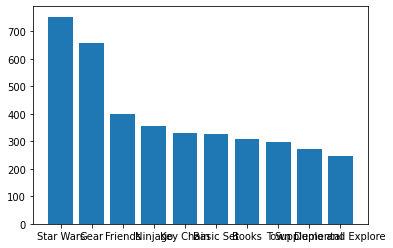

In [155]:
# plot the bar chart
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

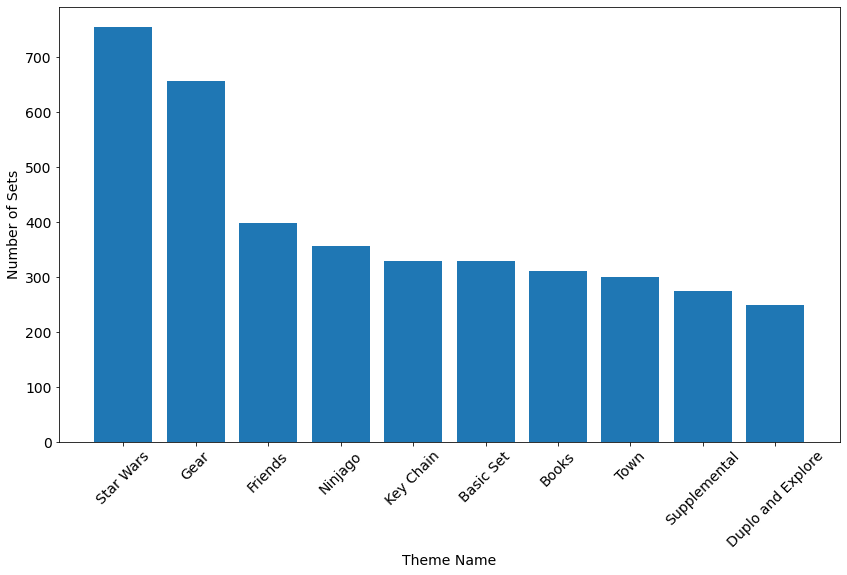

In [156]:
# making a readable bar chart
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

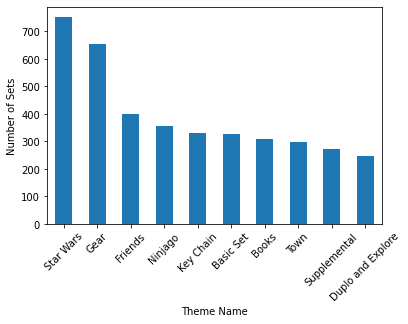

In [157]:
merged_df[:10].plot("name", "set_count", kind='bar', xlabel="Theme Name", ylabel="Number of Sets", rot=45, legend=False)
